<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Renewable_Energy_Forecasting_with_pandas_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

In this notebook, we are going to be creating a several  machine learning models for the predictions of energy generated by wind turbine system, given the  weather conditions  an hour prior

(##TARGET COLUMN is **System power generated**)

Metrics: mean absolute error and mean squared error



**WORKFLOW**

In order to  accomplish  the above goal, we need  to perform the following:

1.   Data Loading and Understanding

2.   Cleaning  the Data

3.   Feature Engineering

4.   Exploratory Data Analysis

5.   Modelling

6.   Hyperparameter  Tuning

7.   Selection Model

8.   Inference Script Creating

**Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in  data

# insataling gwown
!pip install gdown

# import gdown
import gdown

# download the data
#https://drive.google.com/file/d/1Lq9lbb7xUYLp7BCaU7gOQEXPjEbmod1I/view?usp=sharing
file_id = "1Lq9lbb7xUYLp7BCaU7gOQEXPjEbmod1I"

output_file = "Texas Turbine.csv"

gdown.download(id = file_id, output = output_file, quiet=False)

df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1Lq9lbb7xUYLp7BCaU7gOQEXPjEbmod1I
To: /content/Texas Turbine.csv
100%|██████████| 461k/461k [00:00<00:00, 27.1MB/s]


In [3]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [4]:
# getting columns
df.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [5]:
# getting dimension
df.shape

(8760, 6)

**Cleaning  the Data**

In [6]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [7]:
# Check for missing values
# Fix the timestamp
# Set the timestamp as index
# Check for duplicated values


In [8]:
# Check for missing values : filna(mehod, values)
df.isna().sum()


Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [9]:
# Fix the timestamp

df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

df['Time stamp']  = df['Time stamp'].str.replace('1900', '2021')

# convert
df['Time stamp'] = pd.to_datetime(df['Time stamp'])

In [10]:
df['Time stamp']

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8755   2021-12-31 19:00:00
8756   2021-12-31 20:00:00
8757   2021-12-31 21:00:00
8758   2021-12-31 22:00:00
8759   2021-12-31 23:00:00
Name: Time stamp, Length: 8760, dtype: datetime64[ns]

In [11]:
# Set the timestamp as index

df.set_index('Time stamp', inplace=True)

In [12]:
df.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
Time stamp,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [13]:
# Check for duplicated values
df.duplicated().sum()

0

**FEATURE ENGINEERING**

In [14]:
# extract the following informations from date index : day of week, week, month, quarter

def extraxct_features(dataframe):
  """
    this function extracts date features from the index of a dataframe and create a season  column
  """

  # copy dataframe
  dataframe = dataframe.copy()

  # extract features

  # cree une nouvelle colonne "trimestre"
  dataframe['quarter'] = dataframe.index.quarter
  # cree une nouvelle colonne "mois"
  dataframe['month'] = dataframe.index.month.astype(int)

  # cree une nouvelle colonne "semaine"
  dataframe['week'] = dataframe.index.isocalendar().week.astype(int)

  # cree une nouvelle colonne "heure"
  dataframe['hour'] = dataframe.index.hour

  return dataframe



def map_month_to_season(month):
  """
    this function maps a month to a season
  """

  if 3 <= month <= 5:
    return 'Spring'
  elif 6 <= month <= 8:
    return 'Summer'
  elif 9 <= month <= 11:
    return 'Fall'
  else:
    return 'Winter'

In [15]:
df = extraxct_features(df)

In [16]:
df

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour
Time stamp,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21


In [17]:
df['season'] = df['month'].apply(map_month_to_season)

In [18]:
df

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,Winter
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,Winter
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,Winter


In [19]:
# view my data types
df.dtypes

System power generated | (kW)    float64
Wind speed | (m/s)               float64
Wind direction | (deg)             int64
Pressure | (atm)                 float64
Air temperature | ('C)           float64
quarter                            int32
month                              int64
week                               int64
hour                               int32
season                            object
dtype: object

In [20]:
df.columns

Index(['System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

In [21]:
# renommer les colonnes
df.columns =  ['power_generated', 'wind_speed',
       'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season']

In [22]:
df.head()

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter


**EXPLORATORY DATA ANALYSIS**

In [23]:
# Univariate:  power generated, wind speed, wind  direction, temperature, pressure and season

# Multivariate

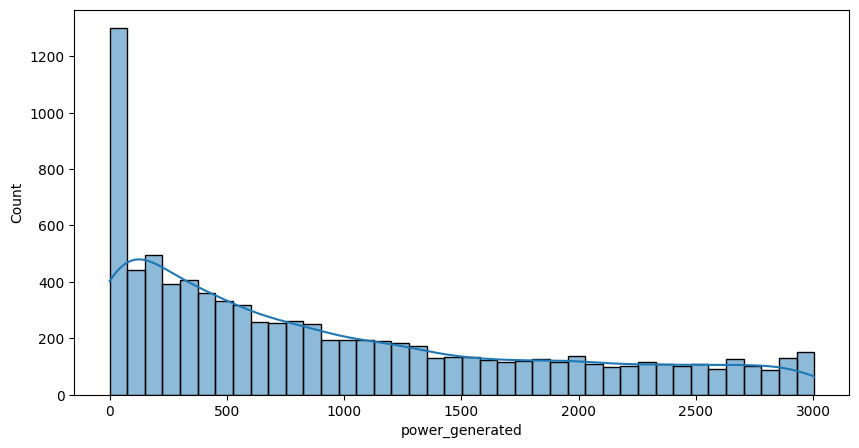

In [24]:
# visualizing the  distribtion for power generated

# specify the plot size
plt.figure(figsize=(10, 5))

# creating an histogram
sns.histplot(df['power_generated'], bins=40, kde=True)


plt.show()
plt.close("all")

In [25]:
df.power_generated.mean()

964.4679340166095

In [26]:
# stat  report on the colummn
df.power_generated.describe()

count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: power_generated, dtype: float64

In [27]:
# selecting out  null  power generated  rows
df[df['power_generated'] <= 0]

# In 822  instances, we get  power generated  to be 0

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,1,1,1,0,Winter
2021-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,Winter
2021-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,1,1,1,22,Winter
2021-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,1,1,1,23,Winter
2021-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,4,12,52,23,Winter
2021-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,4,12,52,0,Winter
2021-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,4,12,52,1,Winter


In [28]:
# getting counts  of season  where power generated is 0
df[df['power_generated'] <= 0]['season'].value_counts()

season
Fall      284
Winter    239
Summer    191
Spring    108
Name: count, dtype: int64

<ipython-input-29-f57b11f208c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


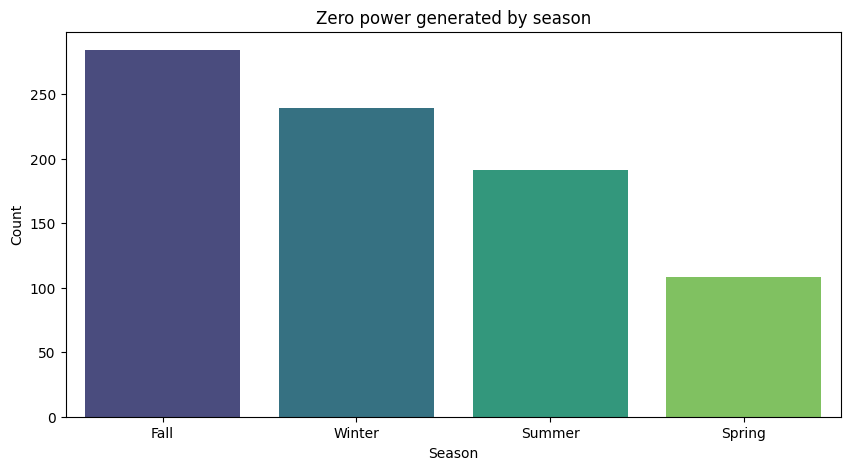

In [29]:
# barplots
season_counts = df[df['power_generated'] <= 0]['season'].value_counts()

# specify the plot size
plt.figure(figsize=(10, 5))
# plot the barplot
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')

plt.title("Zero power generated by season")
plt.xlabel("Season")
plt.ylabel("Count")

plt.show();
plt.close("all")

<Axes: ylabel='power_generated'>

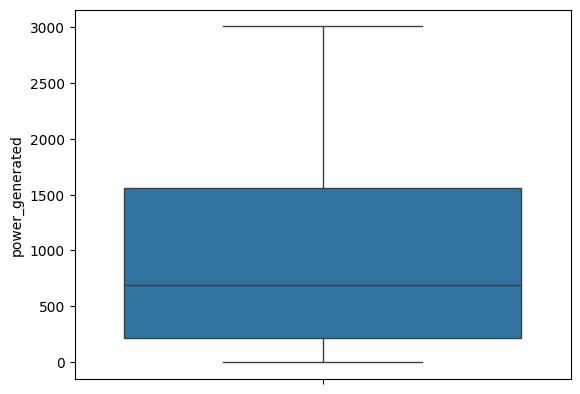

In [30]:
# power generated in  boxplot
sns.boxplot(df['power_generated'])

There is an absence of outliers in  the power generated column

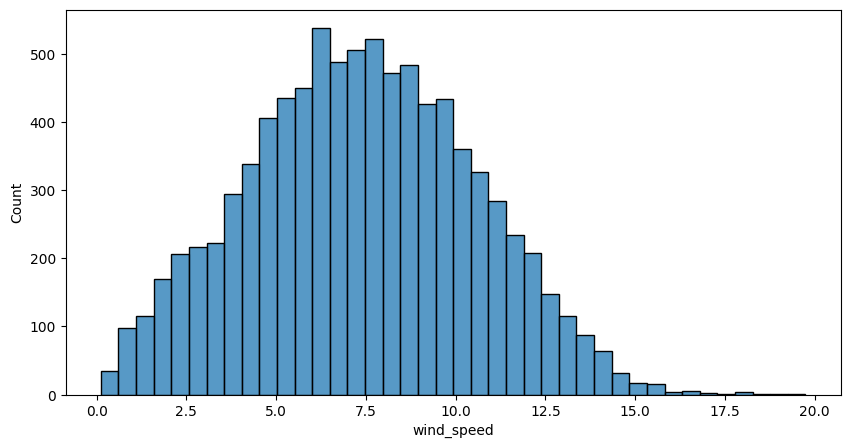

In [31]:
#Checking for distribution of wind speed

plt.figure(figsize=(10, 5))
sns.histplot(df['wind_speed'], bins=40)
plt.show()
plt.close("all")


wind speed is normally distributed

<Axes: ylabel='wind_dir'>

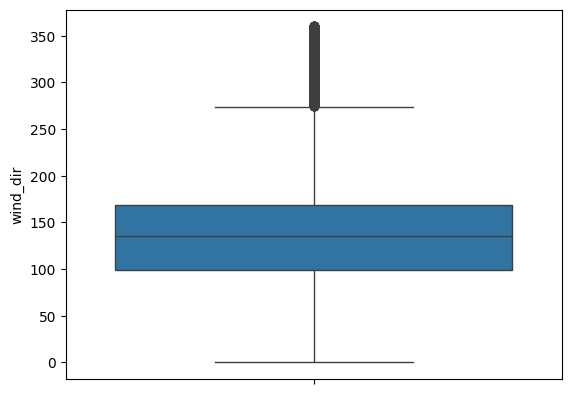

In [32]:
sns.boxplot(df['wind_dir'])

# sevrity is not too large

# you could remove  outliers: by capping or transforming


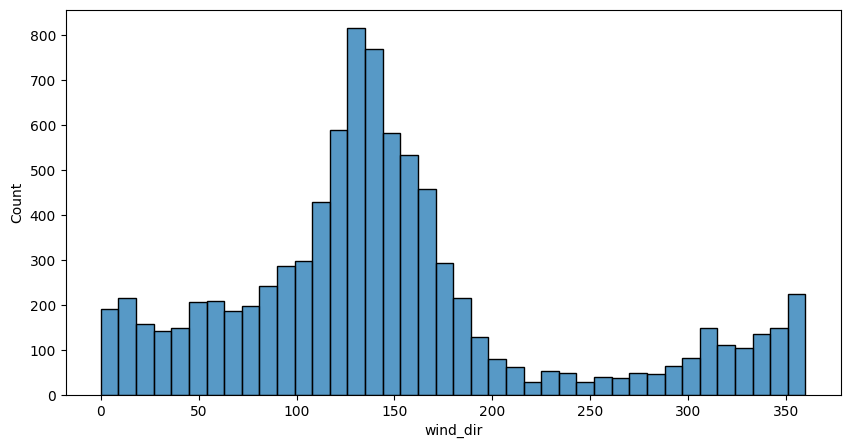

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df['wind_dir'], bins=40)
plt.show()
plt.close("all")

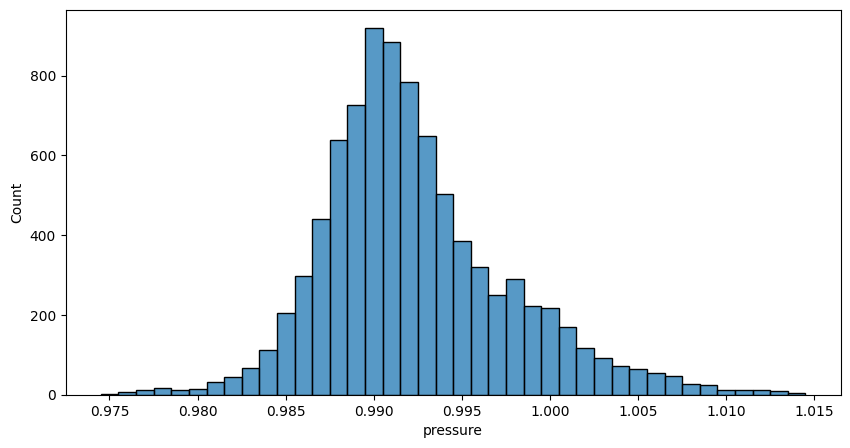

In [34]:
# show the distribution of the pressure values
plt.figure(figsize=(10, 5))
sns.histplot(df['pressure'], bins=40)
plt.show()
plt.close("all")

In [35]:
df.columns = ['power_generated', 'wind_speed',
       'wind_dir', 'pressure', 'temp',
       'quarter', 'month', 'week', 'hour', 'season']

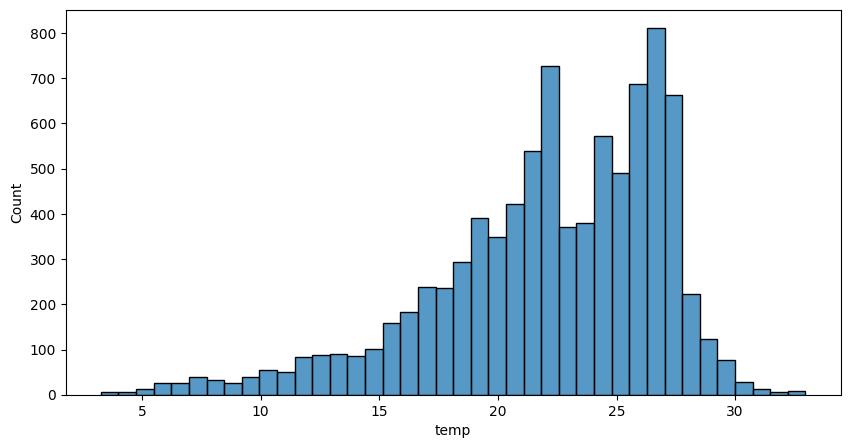

In [36]:
# show the distribution of the temperature values
plt.figure(figsize=(10, 5))
sns.histplot(df['temp'], bins=40)
plt.show()
plt.close("all")

temperature is skweed  to the right probably  due to the fact  tha warm days are  more than cold days

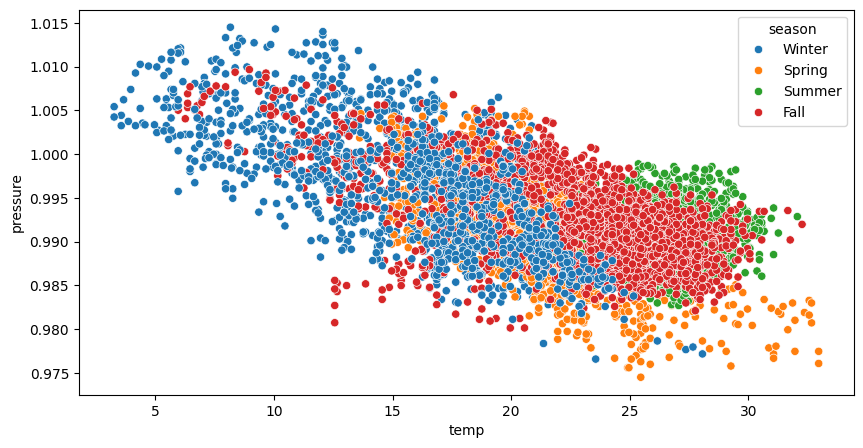

In [37]:
# multivariate

# temperature vs pressure
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='pressure', data=df, hue='season')
plt.show()
plt.close("all")

Winter : colder days (lowertemp, less than 20)

Spring : high temp at low pressure and low temp at high pressure

Summer: high temperature

Fall : widset range of temperature  and  pressure

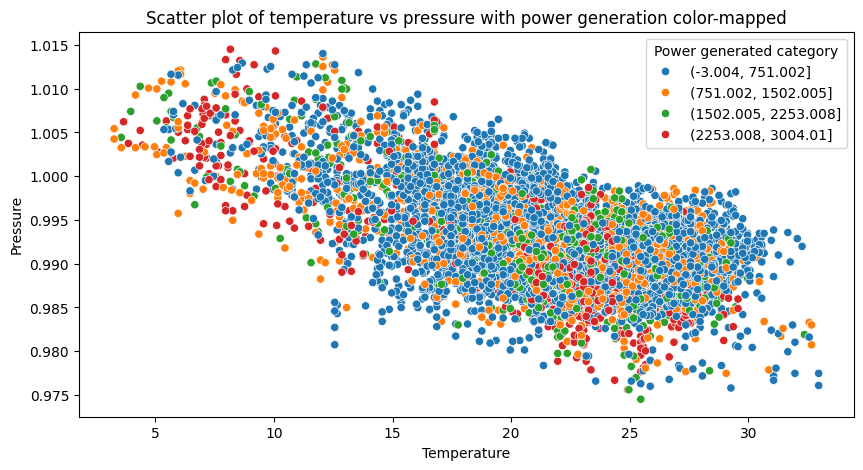

In [38]:

# Définir le nombre de catégories (bins) pour la variable 'power_generated'
num_bins = 4

# Diviser les données de 'power_generated' en catégories égales
binded_data = pd.cut(df['power_generated'], bins=num_bins)

# Configurer la taille de la figure pour le graphique
plt.figure(figsize=(10, 5))

# Créer un graphique en nuage de points (scatter plot)
# 'data=df' spécifie le DataFrame à utiliser
# 'x='temp'' indique que les valeurs de température seront sur l'axe des x
# 'y='pressure'' indique que les valeurs de pression seront sur l'axe des y
# 'hue=binded_data' colorie les points selon les catégories de génération de puissance
sns.scatterplot(data=df, x='temp', y='pressure', hue=binded_data)

# Ajouter un titre au graphique
plt.title("Scatter plot of temperature vs pressure with power generation color-mapped")

# Étiqueter l'axe des x (température)
plt.xlabel("Temperature")

# Étiqueter l'axe des y (pression)
plt.ylabel("Pressure")

# Ajouter une légende au graphique, en haut à droite, avec un titre pour la catégorie de puissance générée
plt.legend(loc='upper right', title="Power generated category")

# Afficher le graphique
plt.show()

# Fermer toutes les figures ouvertes pour libérer la mémoire
plt.close("all")


Nothing to infer other than large occurence of bue dots(0 -751)

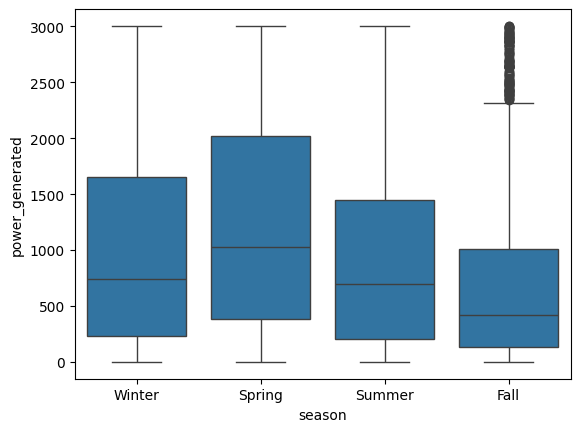

In [39]:
# observe the effect of season  power generation

sns.boxplot(data= df, y='power_generated', x='season')
plt.show()
plt.close("all")

Spring is the most productive season for power generation fall falls behind

In [40]:
# wind caracteristiques


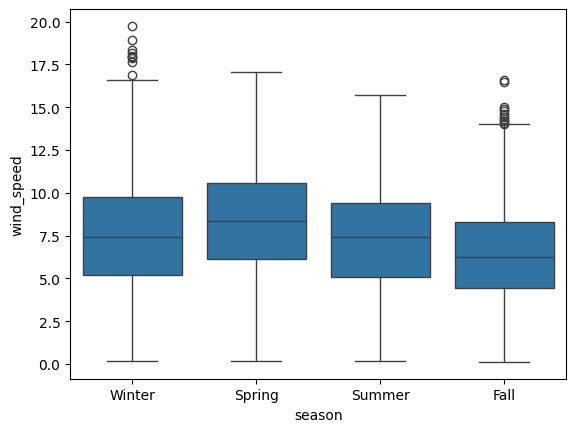

In [41]:
# wind speed and power generated

sns.boxplot(data= df, x='season', y='wind_speed')
plt.show()
plt.close("all")

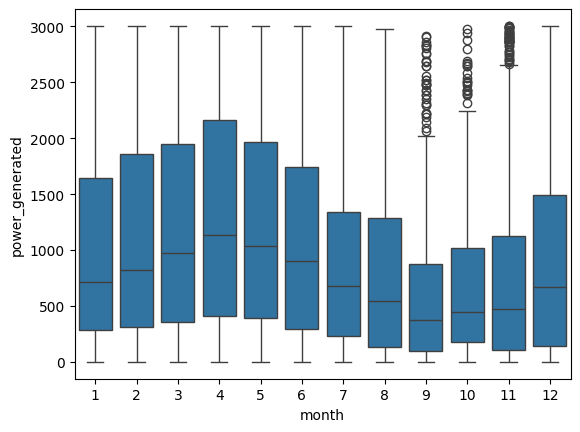

In [42]:
# month and power generated

sns.boxplot(data= df, x='month', y='power_generated')
plt.show()
plt.close("all")

Cyclical pattern emerges when  you compare power generated and month / Un modèle cyclique émerge lorsque vous comparez l’énergie produite et le mois

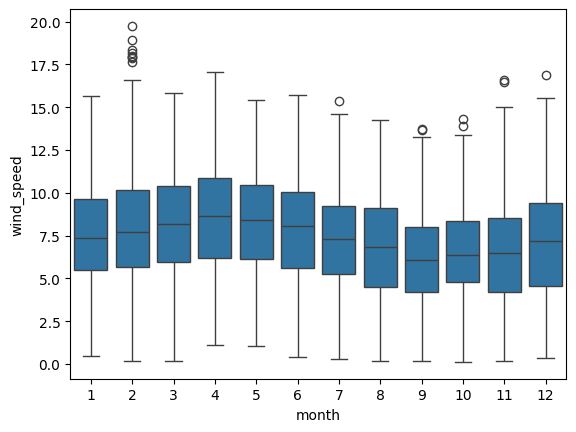

In [43]:
# month and power generated

sns.boxplot(data= df, x='month', y='wind_speed')
plt.show()
plt.close("all")

pattern same for  wind speed  vs month


In [44]:
# scatterplot  for wind  speed and power generated

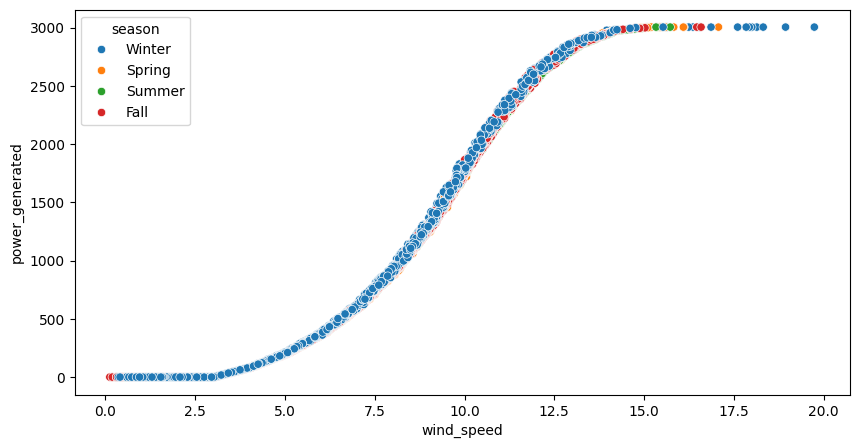

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='wind_speed', y='power_generated', hue='season')
plt.show()
plt.close("all")


Power generated curve

wind speed less than 2.5 doesn't lead to power generation

In [46]:
df['wind_dir']

bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW',  'W',  'NW']

bin_edge = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

binned_data = pd.cut(df['wind_dir'], bins=bin_edge, labels =bin_labels)

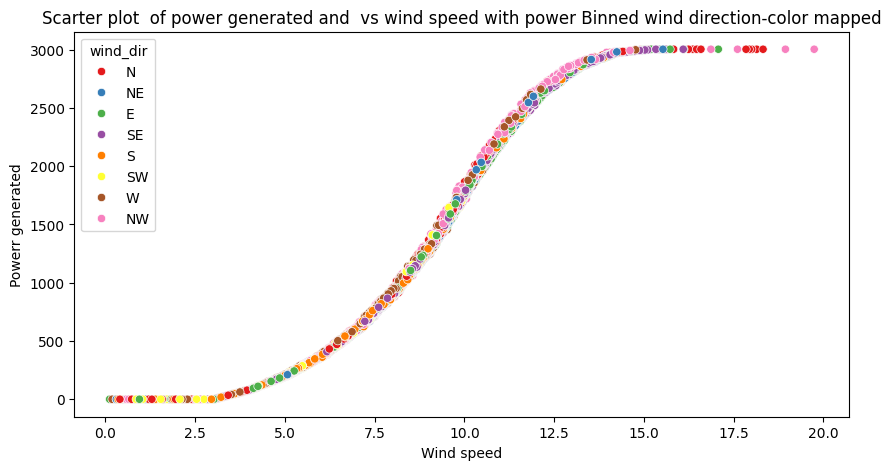

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='wind_speed', y='power_generated', hue=binned_data, palette='Set1')

plt.title("Scarter plot  of power generated and  vs wind speed with power Binned wind direction-color mapped")
plt.xlabel("Wind speed")
plt.ylabel("Powerr generated")
#plt.legend(loc='upper right', title = "Power generated  category")
plt.show()
plt.close("all")

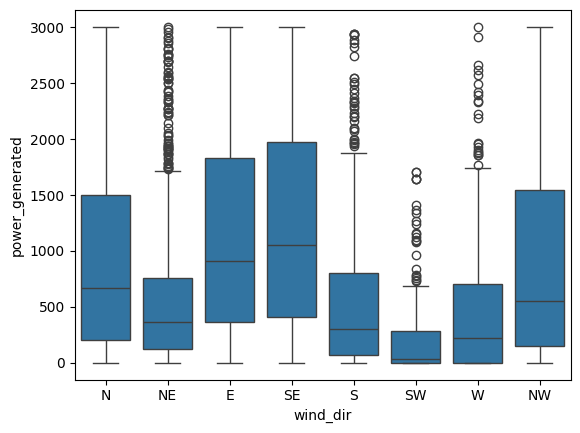

In [48]:
sns.boxplot(x= binned_data, y= df['power_generated'])
plt.show()
plt.close("all")

wind direction also  influences power generated values

In [49]:
# quickly add the wind orientation  feature
df['wind_orientation'] = binned_data

In [50]:
df.head()

,power_generated,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE


**ENCODIND AND MODELING**

In [51]:
df.columns


Index(['power_generated', 'wind_speed', 'wind_dir', 'pressure', 'temp',
       'quarter', 'month', 'week', 'hour', 'season', 'wind_orientation'],
      dtype='object')

In [52]:
len(df) * 0.3 # ce qui veut dire que notre jeu de donnees de test aura cette taille

2628.0

In [53]:
# Sélectionner les données d'entraînement, toutes les lignes sauf les 2628 dernières du DataFrame df
train_data = df[:-2628]

# Sélectionner les données de test, les 2628 dernières lignes du DataFrame df
test_data = df[-2628:]


In [54]:
train_data

,power_generated,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,Fall,SW
2021-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,Fall,W
2021-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,Fall,NW


In [55]:
# perform mean encoding for season
season_mean = train_data.groupby('season')['power_generated'].mean()
df['season_mean_encoded'] = df['season'].map(season_mean)

In [56]:
# perform mean encoding for season
wind_orientation_mean = train_data.groupby('wind_orientation')['power_generated'].mean()
df['wind_orientation_mean_encoded'] = df['wind_orientation'].map(wind_orientation_mean)

In [57]:
df.head()

,power_generated,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season,wind_orientation,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,Winter,E,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,Winter,E,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,Winter,SE,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,Winter,SE,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,Winter,SE,1058.753692,1248.372613


In [58]:
# suppression des colones categorielles apres leur encodage
df.drop(['season', 'wind_orientation'], axis=1, inplace=True)

In [59]:
# Sélectionner les données d'entraînement, toutes les lignes sauf les 2628 dernières du DataFrame df
train_data = df[:-2628]

# Sélectionner les données de test, les 2628 dernières lignes du DataFrame df
test_data = df[-2628:]


In [60]:
train_data

,power_generated,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,867.021622,250.053972
2021-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,867.021622,489.797900
2021-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,867.021622,855.516311


In [61]:
# Modelling

# linear model : Linear Regression

# Support Vector Machine: SVM

# ensemble: rf, gbr


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
df.columns

Index(['power_generated', 'wind_speed', 'wind_dir', 'pressure', 'temp',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation_mean_encoded'],
      dtype='object')

In [64]:
# selecting X and y  train, test values

features = ['wind_speed', 'wind_dir', 'pressure', 'temp',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation_mean_encoded']

target = 'power_generated'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [65]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Gradient Boosting
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [66]:
# predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
gbr_pred = gbr_model.predict(X_test)

In [67]:
# predicting on test set and evalution using mse
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)


In [68]:
print("Linear Regression MSE:", lr_mse)
print("Random Forest MSE:", rf_mse)
print("Support Vector Machine MSE:", svm_mse)
print("Gradient Boosting MSE:", gbr_mse)

Linear Regression MSE: 80965.27593634969
Random Forest MSE: 140.71061393782594
Support Vector Machine MSE: 608393.4168488852
Gradient Boosting MSE: 70.167403427737


In [69]:
# predicting on test set and evalution using mae
lr_mae = mean_absolute_error(y_test, lr_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)

In [70]:
print("Linear Regression MAE:", lr_mae)
print("Random Forest MAE:", rf_mae)
print("Support Vector Machine MAE:", svm_mae)
print("Gradient Boosting MAE:", gbr_mae)

Linear Regression MAE: 228.93177190271575
Random Forest MAE: 5.464082600650662
Support Vector Machine MAE: 620.6563659850767
Gradient Boosting MAE: 5.730821653897459


In [71]:
y_test.mean()

739.5319913727169

In [72]:
5/739

0.006765899864682003

In [73]:
# rf and gbr were off by roughly 0.6 percent

In [74]:
5/739 * 100

0.6765899864682002

Hyperparameter for Random Forest Regressor and Gradient Boosting Regressor

**HYPERPARAMETER TUNING USING HYPEROPT AND BAYESIAN OPTIMIZATION**

Hyperparameter tuning is a crucial step in obtimizing machine learning models. HyperOpt is  a Python library that provides a convenient way  to perform hyperparameter  tuning using Bayesian Optimization techniques. Bayesian technique is a probabilistic model based optimization   method that can efficiently search the hyperparameter space to find the optimal set  of hyperparameters  for a given machine learning model.

Space/set of hyperparameters ==> optimal values for each hyperparameter

In [75]:
# last 1200 values for X_val
X_val = X_train[-1200:]
y_val = y_train[-1200:]

# everything  else  for X_train
X_train = X_train[:-1200]
y_train = y_train[:-1200]

In [76]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

## create a space
space = {
    "n_estimators": hp.quniform("n_estimators", 100, 300, 1),
    "max_depth": hp.quniform("max_depth", 5, 20, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2", None]),
}

## objective  ==>  from this space, create a Random Forest Model, evaluate the model , loss/mse
def objective(params):
  n_estimators = int(params["n_estimators"])
  max_depth = int(params["max_depth"])
  max_features = params["max_features"]

  model = RandomForestRegressor(
      n_estimators=n_estimators,
      max_depth=max_depth,
      max_features= max_features,
      random_state=42)

  rf_model = model.fit(X_train, y_train)
  y_pred = rf_model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)

  return {"loss": mse, "status": STATUS_OK}

## miniize the objective: fmin

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    verbose=1
    )

print('Best HyperParameteres : \t', best)

100%|██████████| 100/100 [06:42<00:00,  4.03s/trial, best loss: 27.817601161135407]
Best HyperParameteres : 	 {'max_depth': 17.0, 'max_features': 2, 'n_estimators': 190.0}


In [77]:
best_rf_hyperparameters = {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 237.0}

best_rf_hyperparameters

{'max_depth': 15.0, 'max_features': 2, 'n_estimators': 237.0}

In [78]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

## create a space
space = {
    "n_estimators": hp.quniform("n_estimators", 100, 300, 1),
    "max_depth": hp.quniform("max_depth", 5, 20, 1),
    "learning_rate": hp.loguniform("learning_rate", -5,0 ),
    "subsample": hp.uniform("subsample", 0.1, 1.0),
}

## objective  ==>  from this space, create a Random Forest Model, evaluate the model , loss/mse
def objective(params):
  n_estimators = int(params["n_estimators"])
  max_depth = int(params["max_depth"])
  #max_features = params["max_features"]

  gbr_model = GradientBoostingRegressor(
      n_estimators=n_estimators,
      max_depth=max_depth,
      learning_rate= params['learning_rate'] ,
      subsample= params['subsample'],
      random_state=42)

  gbr_model = gbr_model.fit(X_train, y_train)
  y_pred = gbr_model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)

  return {"loss": mse, "status": STATUS_OK}

## miniize the objective: fmin

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    verbose=1
    )

print('Best HyperParameteres : \t', best)

100%|██████████| 100/100 [05:33<00:00,  3.34s/trial, best loss: 6.027107590166239]
Best HyperParameteres : 	 {'learning_rate': 0.02479638833155227, 'max_depth': 18.0, 'n_estimators': 291.0, 'subsample': 0.17051006018722778}


In [79]:
best_gbr_hyperparameters = {'learning_rate': 0.04633189702220179, 'max_depth': 6.0, 'n_estimators': 260.0, 'subsample': 0.34091545610534835}

In [80]:
# Sélectionner les données d'entraînement, toutes les lignes sauf les 2628 dernières du DataFrame df
train_data = df[:-2628]

# Sélectionner les données de test, les 2628 dernières lignes du DataFrame df
test_data = df[-2628:]

In [81]:
# selecting X and y  train, test values

features = ['wind_speed', 'wind_dir', 'pressure', 'temp',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation_mean_encoded']

target = 'power_generated'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [82]:
rf_model = RandomForestRegressor(
    n_estimators=241,
    max_features=2,
    max_depth=15,
    random_state=42
    )
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest MSE:", rf_mse)
print("Random Forest MAE:", rf_mae)

Random Forest MSE: 73452.0203733416
Random Forest MAE: 187.5849427888616


In [83]:
'''gbr_model = GradientBoostingRegressor(
    n_estimators=241,
    max_depth=15,
    random_state=42,
    learning_rate= best_gbr_hyperparameters['learning_rate'],
    subsample= best_gbr_hyperparameters['subsample']
    )
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
gbr_model = mean_squared_error(y_test, gbr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)'''

gbr_model = GradientBoostingRegressor(
    n_estimators=241,
    max_depth=15,
    random_state=42,
    learning_rate= best_gbr_hyperparameters['learning_rate'],
    subsample= best_gbr_hyperparameters['subsample']
)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

# Calculer les métriques d'erreur, mais ne pas écraser gbr_model
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)

print("Gradient Boosting MSE:", gbr_mse)
print("Gradient Boosting MAE:", gbr_mae)

Gradient Boosting MSE: 67.0811323494238
Gradient Boosting MAE: 4.043207460595619


** BEST PERFORMING MODEL: GRADIENT BOOSTING REGRESSOR USING THE BEST HYPERPARAMETER

**Inference Script Creation**

In [171]:
df = pd.read_csv(output_file)

features = df.sample(1)


features
features.columns = ['Time stamp' ,'power_generated' ,'wind_speed', 'wind_dir', 'pressure', 'temp'
      ]

targets = features['power_generated']

features = features.drop('power_generated', axis=1)

features

,Time stamp,wind_speed,wind_dir,pressure,temp
2199,"Apr 2, 03:00 pm",8.443,95,0.991595,20.663


In [172]:
'''def fix_timestamp(df):

  """

  this function converts data time column   to a proper format and set it as index
  """
  # Fix the timestamp

  df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

  df['Time stamp']  = df['Time stamp'].str.replace('1900', '2021')

  # convert
  df['Time stamp'] = pd.to_datetime(df['Time stamp'])

  # set index
  df.set_index('Time stamp', inplace=True)

  return df'''


'def fix_timestamp(df):\n\n  """\n\n  this function converts data time column   to a proper format and set it as index\n  """\n  # Fix the timestamp\n\n  df[\'Time stamp\'] = pd.to_datetime(df[\'Time stamp\'], format=\'%b %d, %I:%M %p\').dt.strftime(\'%Y-%m-%d %H:%M:%S\')\n\n  df[\'Time stamp\']  = df[\'Time stamp\'].str.replace(\'1900\', \'2021\')\n\n  # convert\n  df[\'Time stamp\'] = pd.to_datetime(df[\'Time stamp\'])\n\n  # set index\n  df.set_index(\'Time stamp\', inplace=True)\n\n  return df'

In [173]:
def fix_timestamp(df):

  """

  this function converts data time column   to a proper format and set it as index
  """
  # Fix the timestamp

  df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

  df['Time stamp']  = df['Time stamp'].str.replace('1900', '2021')

  # convert
  df['Time stamp'] = pd.to_datetime(df['Time stamp'])  # Corrected line

  # set index
  df.set_index('Time stamp', inplace=True)

  return df

In [174]:
fix_timestamp(features)

features

,wind_speed,wind_dir,pressure,temp
Time stamp,,,,
2021-04-02 15:00:00,8.443,95,0.991595,20.663


In [175]:
features = extraxct_features(features)

features['season'] = features['month'].apply(map_month_to_season)


In [176]:
features

,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season
Time stamp,,,,,,,,,
2021-04-02 15:00:00,8.443,95,0.991595,20.663,2,4,13,15,Spring


In [177]:
features.columns

Index(['wind_speed', 'wind_dir', 'pressure', 'temp', 'quarter', 'month',
       'week', 'hour', 'season'],
      dtype='object')

In [178]:
def bin_wind_dir(df):
  # takes in data, converts   the wind dir in degres to cardinal points


  # Define the bins labels
  bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW',  'W',  'NW']

  # ddefine the bins edges
  bin_edge = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

  # bin   the "win dir" column  and assign labels
  binned_data = pd.cut(df['wind_dir'], bins=bin_edge, labels =bin_labels)

  df['wind_orientation'] = binned_data

  return df

In [179]:
features = bin_wind_dir(features)

In [180]:
features.columns

Index(['wind_speed', 'wind_dir', 'pressure', 'temp', 'quarter', 'month',
       'week', 'hour', 'season', 'wind_orientation'],
      dtype='object')

In [181]:
features.head()

,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,
2021-04-02 15:00:00,8.443,95,0.991595,20.663,2,4,13,15,Spring,E


In [182]:
features.columns

Index(['wind_speed', 'wind_dir', 'pressure', 'temp', 'quarter', 'month',
       'week', 'hour', 'season', 'wind_orientation'],
      dtype='object')

In [183]:


def mean_encoder(df, season_mean = season_mean, wind_mean = wind_orientation_mean):

  df['season_mean_encoded'] = df['season'].map(season_mean)
  df['wind_orientation_mean_encoded'] = df['wind_orientation'].map(wind_orientation_mean)
  df.drop(['season', 'wind_orientation'], axis=1, inplace=True)
  return df

In [184]:
features = mean_encoder(features)

In [185]:
features

,wind_speed,wind_dir,pressure,temp,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,
2021-04-02 15:00:00,8.443,95,0.991595,20.663,2,4,13,15,1221.768942,1214.650349


In [186]:
gbr_model.predict(features)

array([1067.85770441])

In [187]:
targets

2199    1068.16
Name: power_generated, dtype: float64

In [188]:
def inference(features, model = gbr_model):


  features = fix_timestamp(features)
  features = extraxct_features(features)
  features['season'] = features['month'].apply(map_month_to_season)
  features = bin_wind_dir(features)

  features = mean_encoder(features)
  predictions = model.predict(features)
  return predictions




In [189]:
inference(features)

KeyError: 'Time stamp'

In [192]:
df = pd.read_csv(output_file)

features = df.sample(9)


features
features.columns = ['Time stamp' ,'power_generated' ,'wind_speed', 'wind_dir', 'pressure', 'temp'
      ]

targets = features['power_generated']

features = features.drop('power_generated', axis=1)

features

,Time stamp,wind_speed,wind_dir,pressure,temp
6497,"Sep 28, 05:00 pm",3.193,337,0.985076,25.963
8322,"Dec 13, 06:00 pm",7.118,308,1.001080,11.213
6661,"Oct 5, 01:00 pm",10.667,45,0.995936,24.463
5822,"Aug 31, 02:00 pm",7.504,91,0.991689,26.963
1185,"Feb 19, 09:00 am",5.151,75,0.992782,17.663
7793,"Nov 21, 05:00 pm",4.024,359,0.987250,22.763
5233,"Aug 7, 01:00 am",3.816,133,0.991986,25.763
2816,"Apr 28, 08:00 am",4.963,21,1.002950,14.463
129,"Jan 6, 09:00 am",11.280,17,1.007990,7.163


In [193]:
inference(features)

array([  11.62955229,  642.43272951, 2062.15679513,  731.24306921,
        224.7800818 ,   78.03786301,   62.08460202,  200.01476476,
       2419.20922472])

In [194]:
targets

6497      11.2665
8322     658.7690
6661    2063.6900
5822     731.4230
1185     224.8240
7793      79.4947
5233      62.1464
2816     200.0680
129     2418.7600
Name: power_generated, dtype: float64